In [ ]:
# VCDB Cybersecurity Incident Analysis
**Using VERIS Community Database (VCDB)**

**Purpose:** Load, clean, and analyze real publicly disclosed cybersecurity incidents to identify trends by industry, year, actor type, and breach occurrence.

In [2]:
!pip install verispy --quiet


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from verispy import VERIS
import os
import zipfile
import requests

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

print("Libraries installed and imported.")

Libraries installed and imported.


In [4]:
vcdb_zip_url = "https://github.com/vz-risk/VCDB/archive/refs/heads/master.zip"
vcdb_zip_path = "VCDB-master.zip"

if not os.path.exists(vcdb_zip_path):
    print("Downloading VCDB dataset...")
    r = requests.get(vcdb_zip_url, stream=True)
    with open(vcdb_zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download completed.")
else:
    print("VCDB zip already exists.")

# Extract only validated JSON files
with zipfile.ZipFile(vcdb_zip_path, 'r') as zip_ref:
    zip_ref.extractall("VCDB_extracted")

vcdb_json_dir = "VCDB_extracted/VCDB-master/data/json/validated"
print("VCDB JSON path:", vcdb_json_dir)

Download completed.
VCDB JSON path: VCDB_extracted/VCDB-master/data/json/validated


In [5]:
# Initialize VERIS loader
v = VERIS(json_dir=vcdb_json_dir)

# Load all validated JSON files into a DataFrame
df_vcdb = v.json_to_df(verbose=True)

print("VCDB loaded successfully! Shape:", df_vcdb.shape)
df_vcdb.head()

Found 9911 json files.
Loading schema
Loading JSON files to DataFrame.


100%|█████████████████████████████████████| 9911/9911 [00:01<00:00, 9073.66it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)


/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:311: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[colname] = df['victim.industry2'].apply(lambda x: True if x == code else False)
/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:311: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[colname] = df['victim.industry2'].apply(lambda x: True if x == code else False)
/opt/anaconda3/lib/python3.13/site-packages/verispy/veris.py:311: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

Finished building VERIS DataFrame
VCDB loaded successfully! Shape: (9906, 2454)


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZEC,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
0,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NJ,"C.R. Bard, Inc."
1,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Entercom
2,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Wishbone
3,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,British Columbia Ministry of Finance
4,False,False,True,True,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Data Overview & Cleaning
- Inspect key columns: industry, year, actor type, action type, assets, breach status.
- Check for missing values and duplicates.


In [7]:
# Basic info
print("Columns:", df_vcdb.columns.tolist()[:20])
print("Total incidents:", len(df_vcdb))

# Key summary of incident years
print("Incidents per year:")
print(df_vcdb['timeline.incident.year'].value_counts().sort_index())

# Check which columns actually exist in the DataFrame
# Uncomment this line to see all available columns
# print("All columns:", df_vcdb.columns.tolist())

# Modified: Check if columns exist before using them
cols_to_check = ['victim.industry', 'timeline.incident.year']

# Add optional columns only if they exist
if 'action.hacking.variety' in df_vcdb.columns:
    cols_to_check.append('action.hacking.variety')
if 'asset.assets.variety' in df_vcdb.columns:
    cols_to_check.append('asset.assets.variety')
if 'attribute.confidentiality.data_disclosure.Yes' in df_vcdb.columns:
    cols_to_check.append('attribute.confidentiality.data_disclosure.Yes')

print("Missing counts for key columns:")
print(df_vcdb[cols_to_check].isnull().sum())

Columns: ['action.Environmental', 'action.Error', 'action.Hacking', 'action.Malware', 'action.Misuse', 'action.Physical', 'action.Social', 'action.Unknown', 'action.environmental.notes', 'action.environmental.variety.Deterioration', 'action.environmental.variety.EMI', 'action.environmental.variety.ESD', 'action.environmental.variety.Earthquake', 'action.environmental.variety.Fire', 'action.environmental.variety.Flood', 'action.environmental.variety.Hazmat', 'action.environmental.variety.Humidity', 'action.environmental.variety.Hurricane', 'action.environmental.variety.Ice', 'action.environmental.variety.Landslide']
Total incidents: 9906
Incidents per year:
timeline.incident.year
1971       1
1984       2
1994       1
1995       1
1998       1
1999       2
2000       1
2001       5
2002       6
2003      13
2004      17
2005      23
2006      23
2007      51
2008      82
2009      94
2010     588
2011     547
2012    1276
2013    1939
2014    1010
2015     922
2016     843
2017     601


In [ ]:
## Top Industries and Temporal Trends
- Identify most frequently targeted industries.
- Track the number of incidents over time.

/var/folders/1c/047xq38d52q_0xlkhtnvjs6c0000gn/T/ipykernel_8667/1498323876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_industries.index, x=top_industries.values, palette="cubehelix")


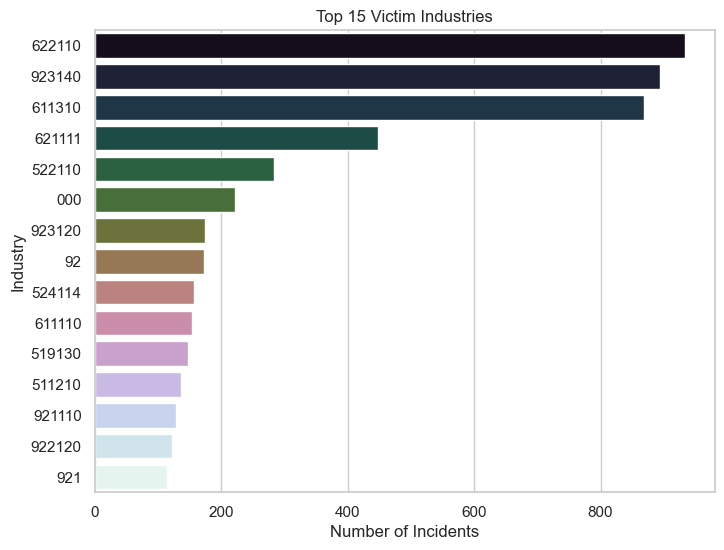

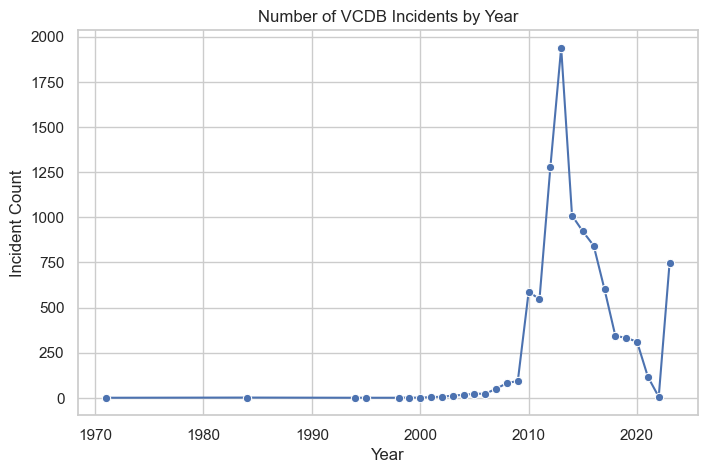

In [8]:
# Top 15 industries
top_industries = df_vcdb['victim.industry'].value_counts().head(15)
plt.figure(figsize=(8,6))
sns.barplot(y=top_industries.index, x=top_industries.values, palette="cubehelix")
plt.title("Top 15 Victim Industries")
plt.xlabel("Number of Incidents")
plt.ylabel("Industry")
plt.show()

# Incidents per year
year_counts = df_vcdb['timeline.incident.year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Number of VCDB Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()

In [ ]:
## Actor & Action Patterns
- Examine who conducts the attacks (external, internal, partner) and attack types (hacking, malware, social engineering, etc.).

In [9]:
# External actor types
if 'actor.external.variety' in df_vcdb.columns:
    actor_counts = df_vcdb['actor.external.variety'].value_counts().head(15)
    plt.figure(figsize=(7,5))
    sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="magma")
    plt.title("Top External Actor Types")
    plt.xlabel("Count")
    plt.ylabel("Actor Type")
    plt.show()

# Hacking action variety
if 'action.hacking.variety' in df_vcdb.columns:
    hack_counts = df_vcdb['action.hacking.variety'].explode().value_counts().head(15)
    plt.figure(figsize=(7,5))
    sns.barplot(x=hack_counts.values, y=hack_counts.index, palette="viridis")
    plt.title("Top Hacking Actions")
    plt.xlabel("Count")
    plt.ylabel("Hacking Action Type")
    plt.show()

In [ ]:
## Breach vs. Non-Breach Incidents
- Examine the proportion of incidents that resulted in confirmed data disclosure.

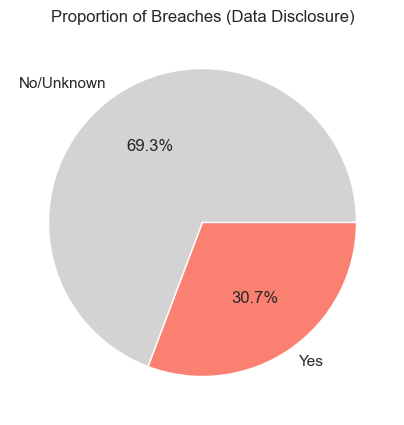

In [10]:
breach_flag = 'attribute.confidentiality.data_disclosure.Yes'

if breach_flag in df_vcdb.columns:
    counts = df_vcdb[breach_flag].value_counts(dropna=False)
    plt.figure(figsize=(5,5))
    counts.plot.pie(autopct='%1.1f%%', labels=['No/Unknown','Yes'], colors=['lightgray','salmon'])
    plt.title("Proportion of Breaches (Data Disclosure)")
    plt.ylabel('')
    plt.show()

In [ ]:
## Save Cleaned VCDB Data
- Export to CSV for further analysis or sharing.

In [11]:
df_vcdb.to_csv("vcdb_cleaned.csv", index=False)
print("Cleaned VCDB data saved to vcdb_cleaned.csv")


Cleaned VCDB data saved to vcdb_cleaned.csv


In [ ]:
## Next Steps
- Merge with vulnerability (CVE/NVD) datasets for exploitation analysis.
- Perform industry-level risk assessment and actor analysis.
- Geospatial mapping if location data is available.
- Build predictive models for high-risk sectors or incident types.